In [7]:
##Lalith Aditya Chunduri
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


!wget https://www.tensorflow.org/datasets/catalog/fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


--2025-04-07 17:26:30--  https://www.tensorflow.org/datasets/catalog/fashion_mnist
Resolving www.tensorflow.org (www.tensorflow.org)... 142.251.107.101, 142.251.107.102, 142.251.107.113, ...
Connecting to www.tensorflow.org (www.tensorflow.org)|142.251.107.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524513 (512K) [text/html]
Saving to: ‘fashion_mnist.2’

fashion_mnist.2     100%[===================>] 512.22K  2.56MB/s    in 0.2s    

2025-04-07 17:26:32 (2.56 MB/s) - ‘fashion_mnist.2’ saved [524513/524513]



In [8]:
# Load Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize input
train_images_fcnn = train_images / 255.0
test_images_fcnn = test_images / 255.0

# Flatten for FCNN
train_images_fcnn = train_images_fcnn.reshape((60000, 28*28))
test_images_fcnn = test_images_fcnn.reshape((10000, 28*28))

# FCNN model
FCNN_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

FCNN_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train FCNN
FCNN_history = fcnn_model.fit(train_images_fcnn, train_labels,
                              validation_data=(test_images_fcnn, test_labels),
                              epochs=10, batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8972 - loss: 0.2779 - val_accuracy: 0.8810 - val_loss: 0.3337
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8990 - loss: 0.2703 - val_accuracy: 0.8818 - val_loss: 0.3349
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8978 - loss: 0.2681 - val_accuracy: 0.8850 - val_loss: 0.3309
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9016 - loss: 0.2608 - val_accuracy: 0.8878 - val_loss: 0.3296
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9026 - loss: 0.2572 - val_accuracy: 0.8878 - val_loss: 0.3241
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9031 - loss: 0.2518 - val_accuracy: 0.8883 - val_loss: 0.3268
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9062 - loss: 0.2500 - val_accuracy: 0.8853 - val_loss: 0.3279
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9071 - loss: 0.2473 - val_accuracy: 0.

In [9]:
# Normalize input (not flattened for CNN)
train_images_cnn = train_images / 255.0
test_images_cnn = test_images / 255.0

# Reshape to include channel dimension
train_images_cnn = train_images_cnn.reshape((60000, 28, 28, 1))
test_images_cnn = test_images_cnn.reshape((10000, 28, 28, 1))

# CNN model
CNN_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN
CNN_history = CNN_model.fit(train_images_cnn, train_labels,
                            validation_data=(test_images_cnn, test_labels),
                            epochs=10, batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7477 - loss: 0.7078 - val_accuracy: 0.8669 - val_loss: 0.3711
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8789 - loss: 0.3358 - val_accuracy: 0.8800 - val_loss: 0.3254
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8921 - loss: 0.2899 - val_accuracy: 0.8739 - val_loss: 0.3379
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9042 - loss: 0.2590 - val_accuracy: 0.8996 - val_loss: 0.2753
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9140 - loss: 0.2325 - val_accuracy: 0.8991 - val_loss: 0.2744
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9237 - loss: 0.2087 - val_accuracy: 0.9081 - val_loss: 0.2583
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9280 - loss: 0.1955 - val_accuracy: 0.9120 - val_loss: 0.2456
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9339 - loss: 0.1788 - val_accuracy: 0.

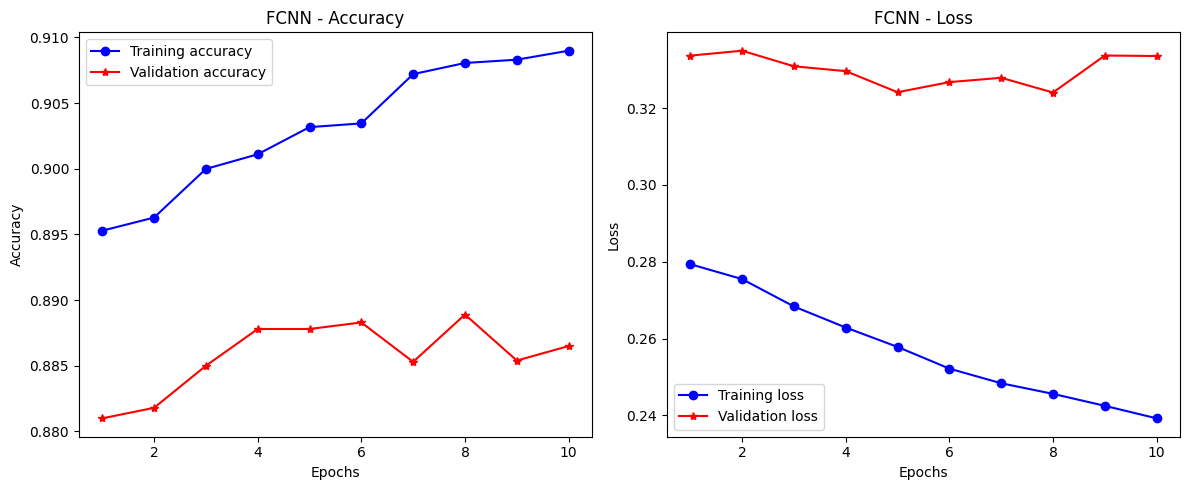

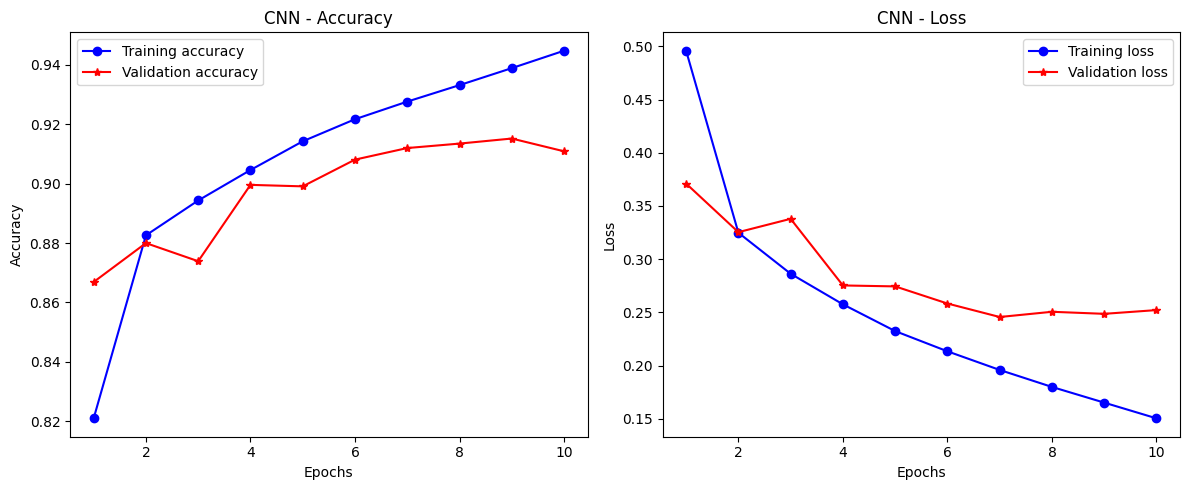

In [10]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(FCNN_history, "FCNN")
plot_history(CNN_history, "CNN")


In [11]:
fcnn_acc = fcnn_model.evaluate(test_images_fcnn, test_labels, verbose=0)[1]
cnn_acc = cnn_model.evaluate(test_images_cnn, test_labels, verbose=0)[1]

print(f"✅ Final Test Accuracy of FCNN: {fcnn_acc * 100:.2f}%")
print(f"✅ Final Test Accuracy of CNN: {cnn_acc * 100:.2f}%")


✅ Final Test Accuracy of FCNN: 88.65%
✅ Final Test Accuracy of CNN: 91.05%
